# Filtering problem probes
### by criteria, or publication source, or sex-linked, or array-controls.

In [1]:
%load_ext autoreload
%autoreload 2

## THE HARD WAY -- when this hasn't been pip installed yet.
#import methpype and methQC -- adjust paths relative to this folder.
import os
print(os.getcwd())

import sys
methQC_path = os.path.abspath(os.path.join('..'))
if methQC_path not in sys.path:
    sys.path.append(methQC_path)
import methQC

methpype_path = os.path.abspath(os.path.join('../../methpype'))
if methpype_path not in sys.path:
    sys.path.append(methpype_path)
import methpype 

# ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
print(methQC.__path__, methpype.__path__)

""" ## THE EASY WAY.
import methQC
import methpype
dir()
"""

/Users/mmaxmeister/legx/methQC/docs
['/Users/mmaxmeister/legx/methQC/methQC'] ['/Users/mmaxmeister/legx/methpype/methpype']


' ## THE EASY WAY.\nimport methQC\nimport methpype\ndir()\n'

# All available probe exclusion lists
#### Filter either by the publication source, or by the type of effect (e.g. Polymorphism)

In [2]:
criteria = ['Chen2013', 'Price2013', 'Naeem2014', 'DacaRoszak2015',
            'Polymorphism', 'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']
EPIC_criteria = ['McCartney2016', 'Zhou2016', 'Polymorphism', 'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']

print('450k')
for crit in criteria:
    print(crit, len(methQC.list_problem_probes('450k', [crit])))
print('EPIC')
for crit in EPIC_criteria:
    print(crit, len(methQC.list_problem_probes('EPIC', [crit])))


450k
Chen2013 265410
Price2013 213246
Naeem2014 128695
DacaRoszak2015 89678
Polymorphism 289952
CrossHybridization 92524
BaseColorChange 359
RepeatSequenceElements 96631
EPIC
McCartney2016 326267
Zhou2016 178671
Polymorphism 346033
CrossHybridization 108172
BaseColorChange 406
RepeatSequenceElements 0


In [27]:
# read in the sample sheet for the experiment
baseDir = "example_data/GSE69852/"
# generate a dataframe of beta values for these samples with pipeline.
df = methpype.run_pipeline(baseDir, betas=True)

100%|██████████| 6/6 [00:59<00:00,  9.84s/it]


In [28]:
#import importlib
#importlib.reload(methQC)
df.head()

,9247377093_R02C01,9247377093_R03C01,9247377093_R06C02,9247377085_R04C02,9247377093_R05C01,9247377093_R02C02
IlmnID,,,,,,
cg00035864,0.236234,0.287561,0.318016,0.308176,0.239339,0.161795
cg00061679,0.427194,0.395514,0.456510,0.525169,0.523010,0.549533
cg00063477,0.929039,0.927137,0.940222,0.932739,0.930215,0.931468
cg00121626,0.481058,0.357316,0.328793,0.330045,0.403873,0.313132
cg00223952,0.044029,0.040062,0.038420,0.022201,0.027155,0.022284


Of 485512 probes, 290858 matched, yielding 194654 probes after filtering.


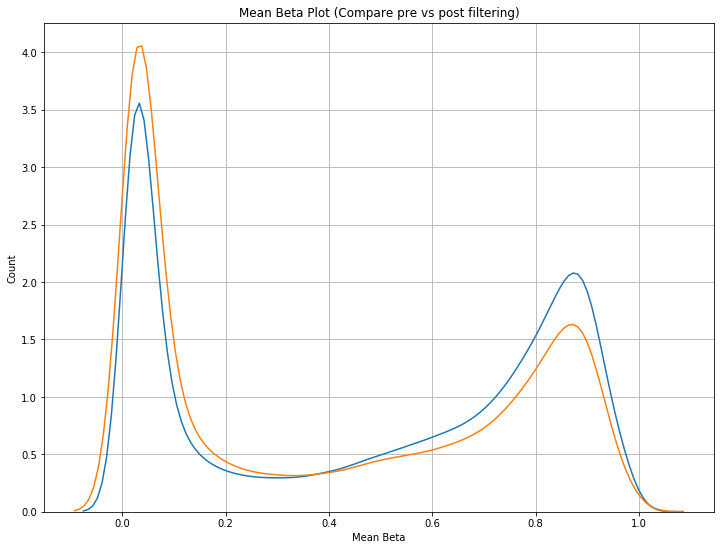

In [32]:
sketchy_probes_list = methQC.list_problem_probes('450k', ['Chen2013','Polymorphism'])
df2 = methQC.exclude_probes(df, sketchy_probes_list)
methQC.mean_beta_compare(df,df2)

### Be careful -- you can apply the a probe list for EPIC to a 450k dataset, and it will work, but won't be good filtering.

Of 485512 probes, 151418 matched, yielding 334094 probes after filtering.


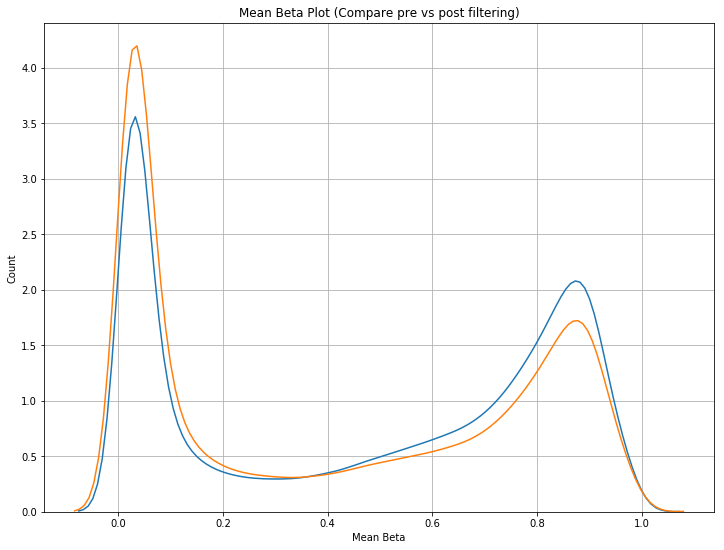

In [34]:
sketchy_probes_list = methQC.list_problem_probes('EPIC', ['McCartney2016'])
df2 = methQC.exclude_probes(df, sketchy_probes_list)
methQC.mean_beta_compare(df,df2)

In [35]:
## Maximum filtering happens by default. (passing no criteria)

Of 485512 probes, 341057 matched, yielding 144455 probes after filtering.


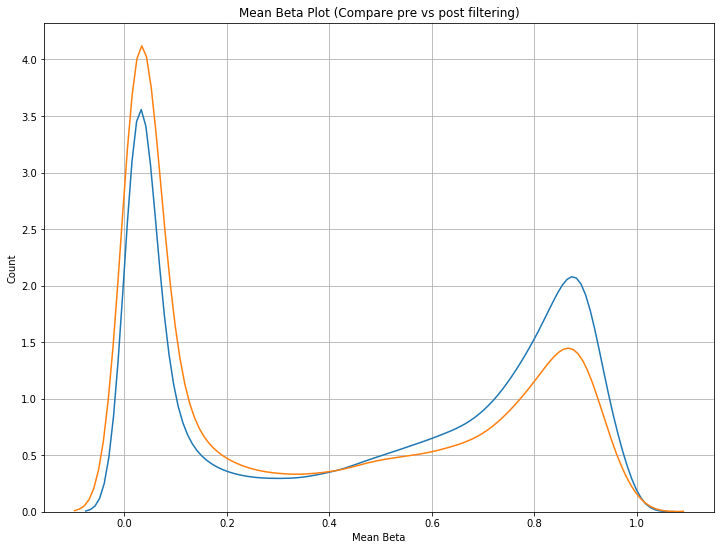

In [36]:
sketchy_probes_list = methQC.list_problem_probes('450k')
df3 = methQC.exclude_probes(df, sketchy_probes_list)
methQC.mean_beta_compare(df,df3)

6


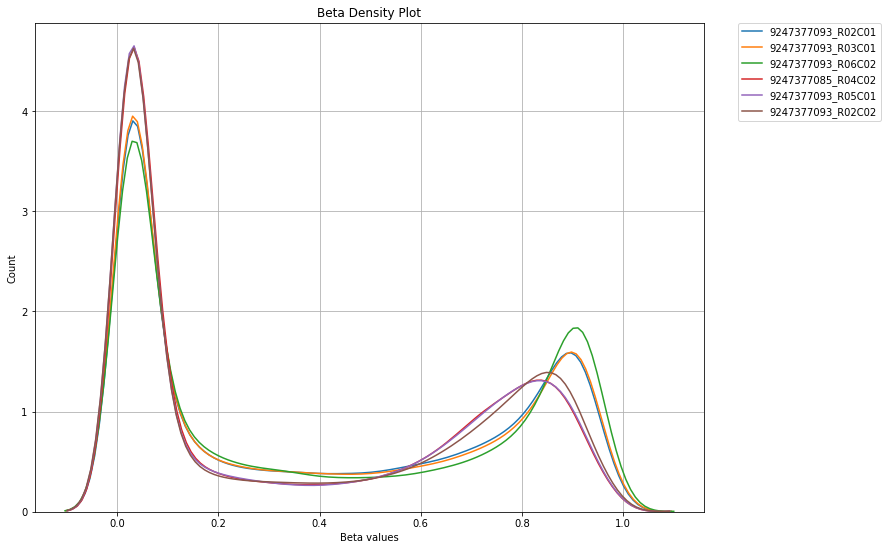

In [37]:
#underlying samples
methQC.beta_density_plot(df3)

#### There are other filtering techniques, such as MDS and cumulative_sum in other example notebooks.